Simple Exercise In Machine Learning:

Data taken from https://archive.ics.uci.edu/ml/datasets/Iris

Data Creator: R.A. Fischer

Program Code: Kevin Bass


As the first step. the libraries numpy, pandas, and matplotlib are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%run machine_learning.ipynb
%run deep_learning.ipynb

In [2]:
def read_file(file):
    """
    intended to check the file is a text file, and then to return
    the information contained within as an object
    """
    if  open(file, "r"):
        return pd.read_csv(file)

In [3]:
def name_to_class(names):
    """
    Argument:
    names - vector of iris names in strings
    
    Returns:
    iris_class - vector containing integers which correspond 
                 to the unique iris names
                 0 - 'Iris-setosa'
                 1 - 'Iris-versicolor'
                 2 - 'Iris-virginica'
    """
    n = names.shape[0]
    m = names.shape[1]
    iris_class = np.zeros((3, m), dtype = float)
    for num in range(0, m):
        if names[0][num] == 'Iris-setosa':
            iris_class[:,num] = [1, 0, 0]
        elif names[0][num] == 'Iris-versicolor':
            iris_class[:,num] = [0, 1, 0]
        elif names[0][num] == 'Iris-virginica':
            iris_class[:,num] = [0, 0, 1]
    return iris_class

In [4]:
def organize_data(data):
    r,c = data.shape
    half = r/2
    if half.is_integer():
        up = half
        down = half
    else:
        up = math.ceil(half)
        down = math.floor(half)
        
    training = {}
    test = {}
    
    np.random.shuffle(data)
    tr, te = data[:up,:], data[up:,:]
    
    train_x = (tr[:,0:4].T).astype(float)
    train_y = name_to_class(tr[:,4].reshape(1,up))
    
    test_x = (te[:,0:4].T).astype(float)
    test_y = name_to_class(te[:,4].reshape(1,down))
    
    training['X'] = train_x
    training['Y'] = train_y
    test['X'] = test_x
    test['Y'] = test_y
    
    return training, test

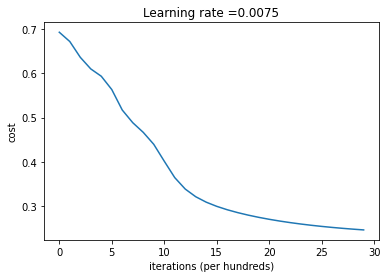

total = 75 correct = 70
Accuracy = 0.9333333333333333
total = 74 correct = 71
Accuracy = 0.9594594594594594


In [5]:
%run machine_learning.ipynb
data_file = "iris.data"
data = np.array(read_file(data_file))
training, test = organize_data(data)

train_x = training["X"]
train_y = training["Y"]
test_x = test["X"]
test_y = test["Y"]

n_x = 4
n_h = 5
n_y = 3
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

layers_dims = (4,5,3)

iris_ML = ML(3, train_x, train_y, test_x, test_y, layers_dims)
iris_ML.run_machine()
iris_ML.machine_accuracy()
#iris_ML.run_optimal(5, plot_costs = False)


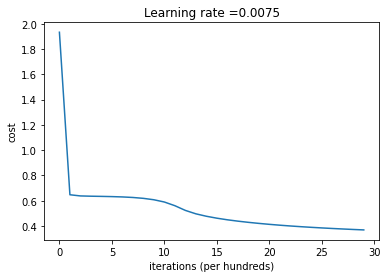

started machine_accuracy
started predict
total = 75 correct = 53
Accuracy = 0.7066666666666667
finished predict
started predict
total = 74 correct = 46
Accuracy = 0.6216216216216216
finished predict
finsihed machine accuracy


In [6]:
%run deep_learning.ipynb
num = len(layers_dims)
iris_DL = DL(num, train_x, train_y, test_x, test_y, layers_dims, output_form = 'multiclass')
iris_DL.run_machine()
iris_DL.machine_accuracy()
#iris_DL.run_optimal

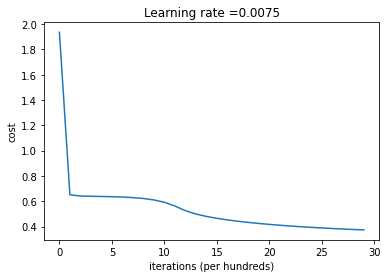

started machine_accuracy
started predict
total = 75 correct = 53
Accuracy = 0.7066666666666667
finished predict
started predict
total = 74 correct = 46
Accuracy = 0.6216216216216216
finished predict
finsihed machine accuracy


In [7]:
iris_DL.set_L2(True)
iris_DL.set_dropout(False)
iris_DL.run_machine()
iris_DL.machine_accuracy()

In [8]:
iris_DL.set_L2(False)
iris_DL.set_dropout(True)
iris_DL.run_machine()
iris_DL.machine_accuracy()

1
(5, 75)
(5, 75)


ValueError: operands could not be broadcast together with shapes (4,75) (5,75) 